In [1]:
!nvidia-smi

Sun Mar  3 08:11:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!yolo cfg

Printing '/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/default.yaml'

agnostic_nms: false
augment: false
batch: 16
box: 7.5
boxes: true
cache: false
cfg: null
classes: null
close_mosaic: 10
cls: 0.5
conf: null
copy_paste: 0.0
cos_lr: false
data: null
degrees: 0.0
deterministic: true
device: null
dfl: 1.5
dnn: false
dropout: 0.0
dynamic: false
epochs: 100
exist_ok: false
fl_gamma: 0.0
fliplr: 0.5
flipud: 0.0
format: torchscript
half: false
hide_conf: false
hide_labels: false
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
image_weights: false
imgsz: 640
int8: false
iou: 0.7
keras: false
label_smoothing: 0.0
line_thickness: 3
lr0: 0.01
lrf: 0.01
mask_ratio: 4
max_det: 300
mixup: 0.0
mode: train
model: null
momentum: 0.937
mosaic: 1.0
name: null
nbs: 64
nms: false
opset: null
optimize: false
optimizer: SGD
overlap_mask: true
patience: 50
perspective: 0.0
plots: true
pretrained: false
project: null
rect: false
resume: false
retina_masks: false
save: true
save_conf: false
save_crop: fals

In [6]:
!pip uninstall albumentations -y

Found existing installation: albumentations 1.3.1
Uninstalling albumentations-1.3.1:
  Successfully uninstalled albumentations-1.3.1


In [8]:
%cd /content/drive/MyDrive/signboard_dataset
!pwd
!ls

!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/signboard_dataset/data.yaml epochs=30 imgsz=640 val=False plots=True augment=False

/content/drive/MyDrive/signboard_dataset
/content/drive/MyDrive/signboard_dataset
data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid  yolov8n.pt
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/signboard_dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=False, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=

In [9]:
!ls runs/detect/train2/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1709453738.8a0c31832abf.1631.0  train_batch1440.jpg    val_batch1_pred.jpg
F1_curve.png					    train_batch1441.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch1442.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch1.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


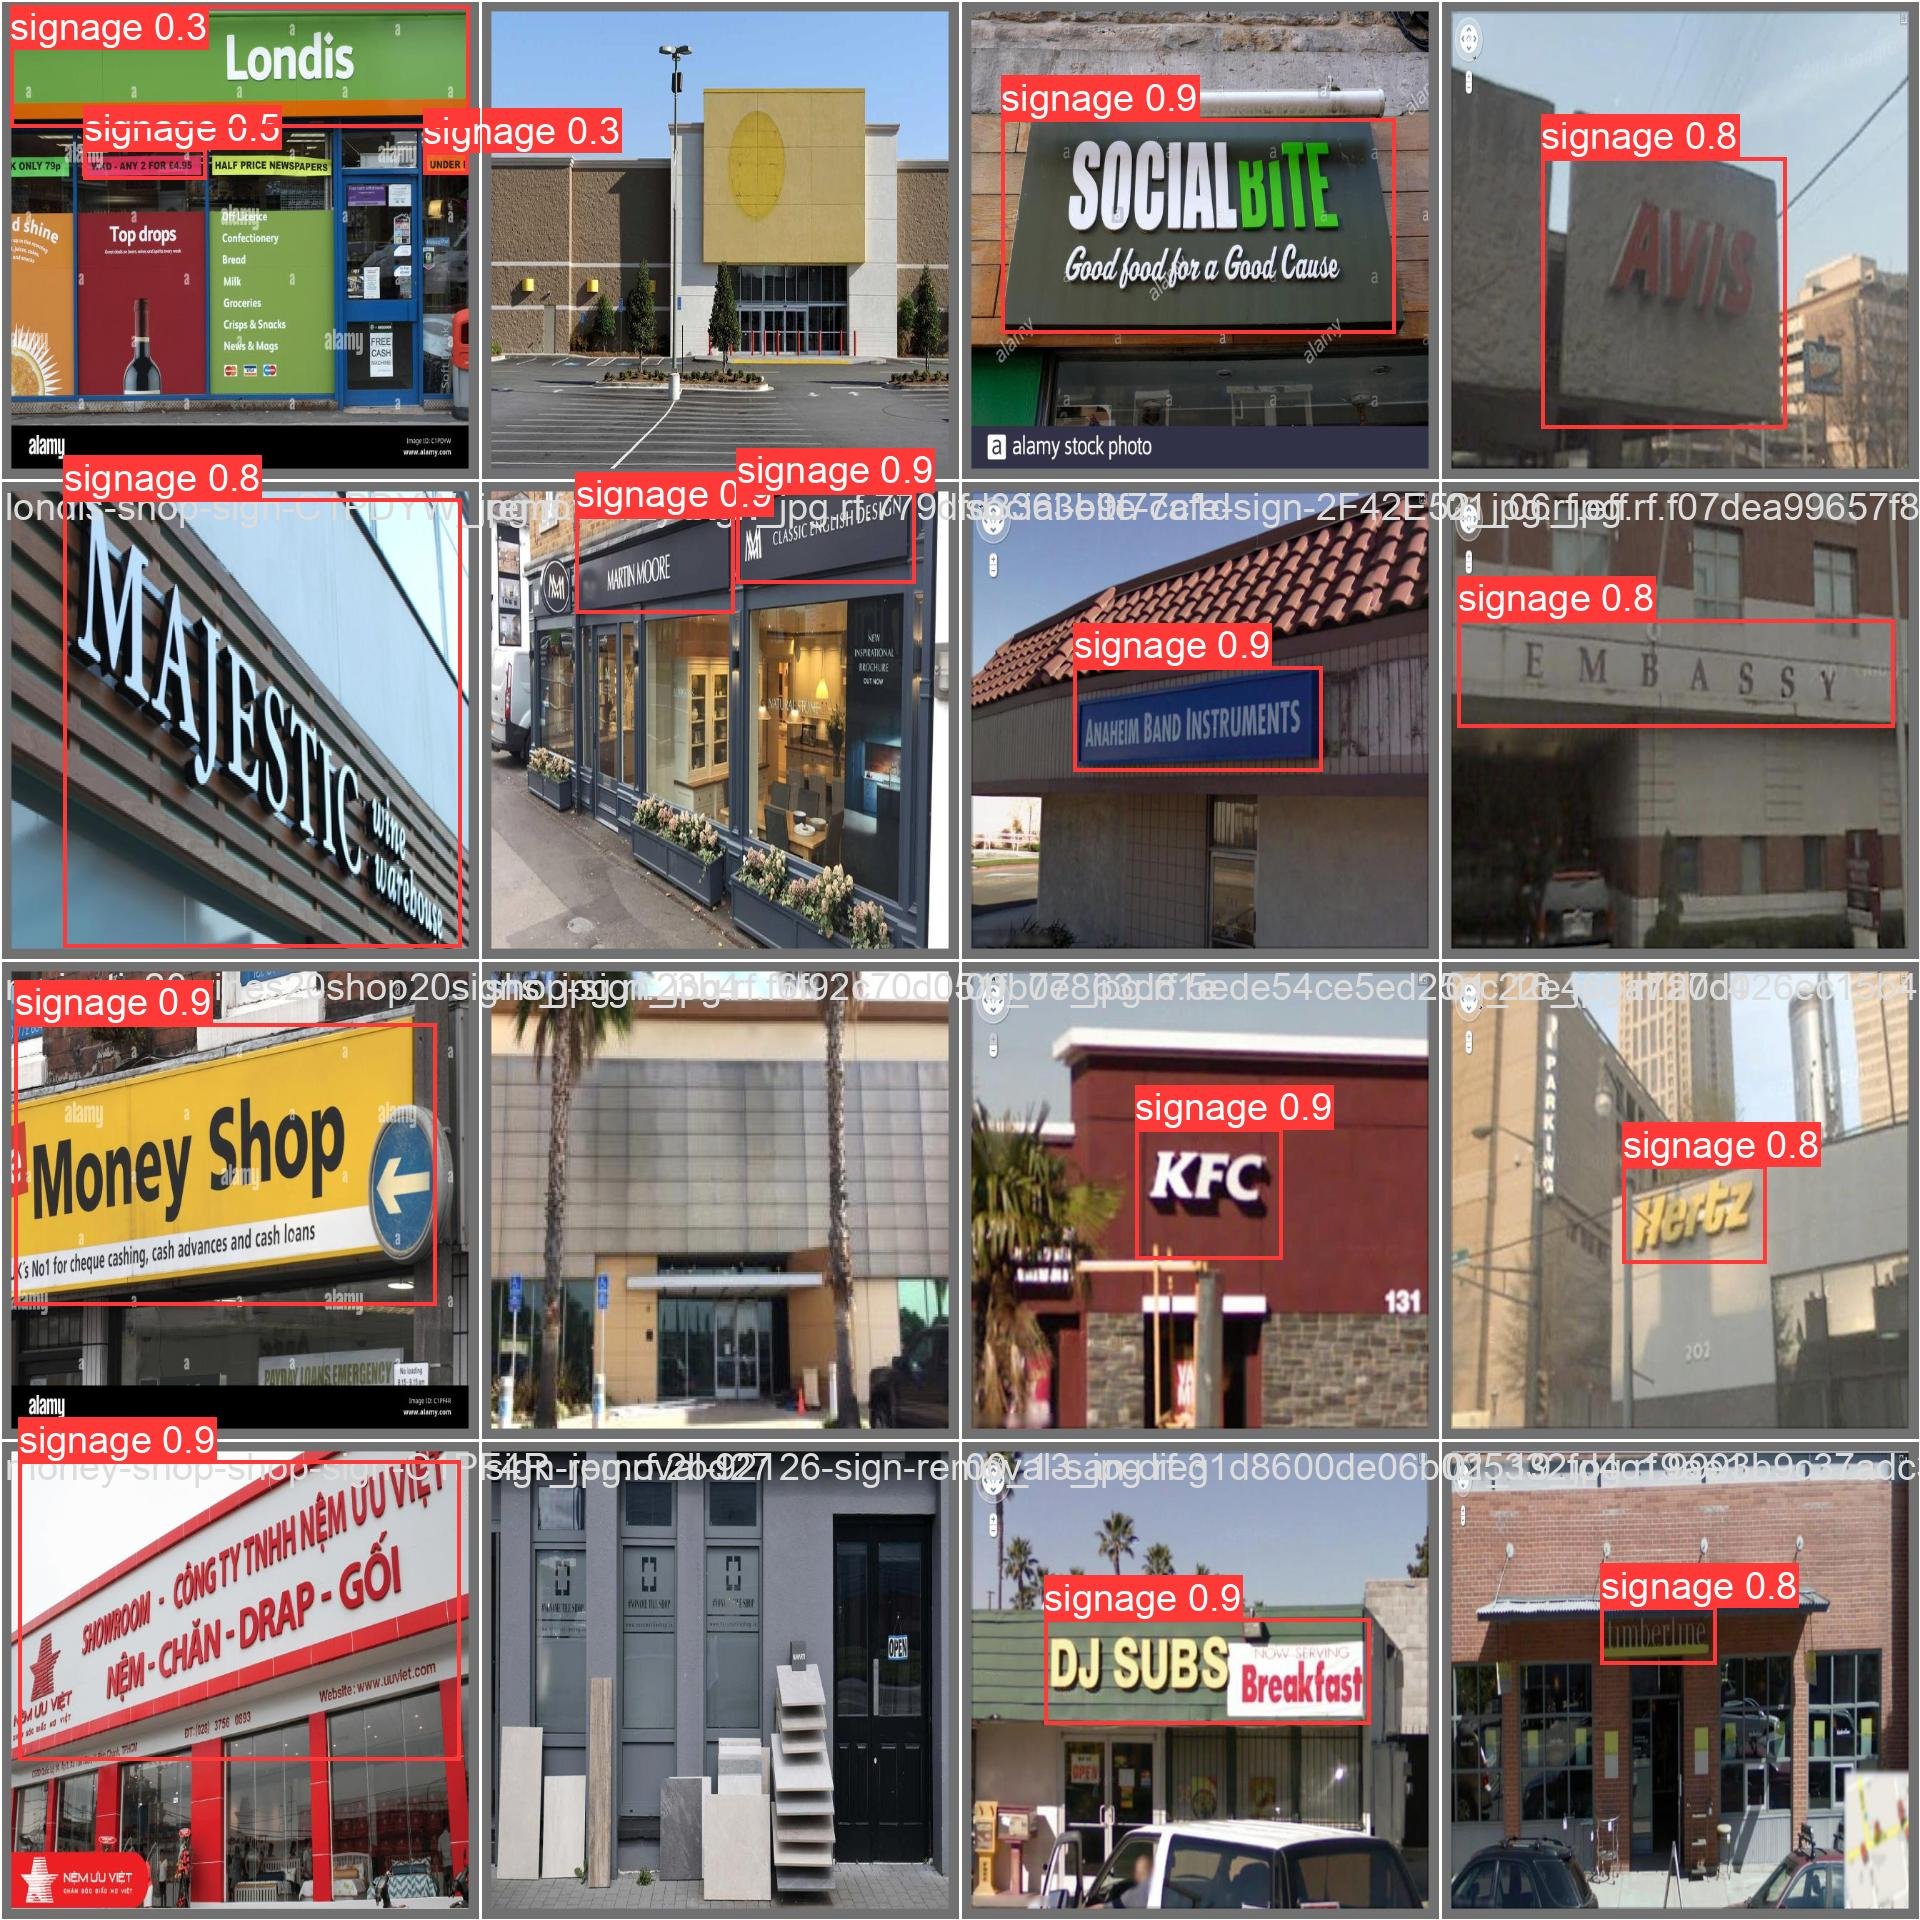

In [10]:
Image(filename='/content/drive/MyDrive/signboard_dataset/runs/detect/train2/val_batch0_pred.jpg', width=600)

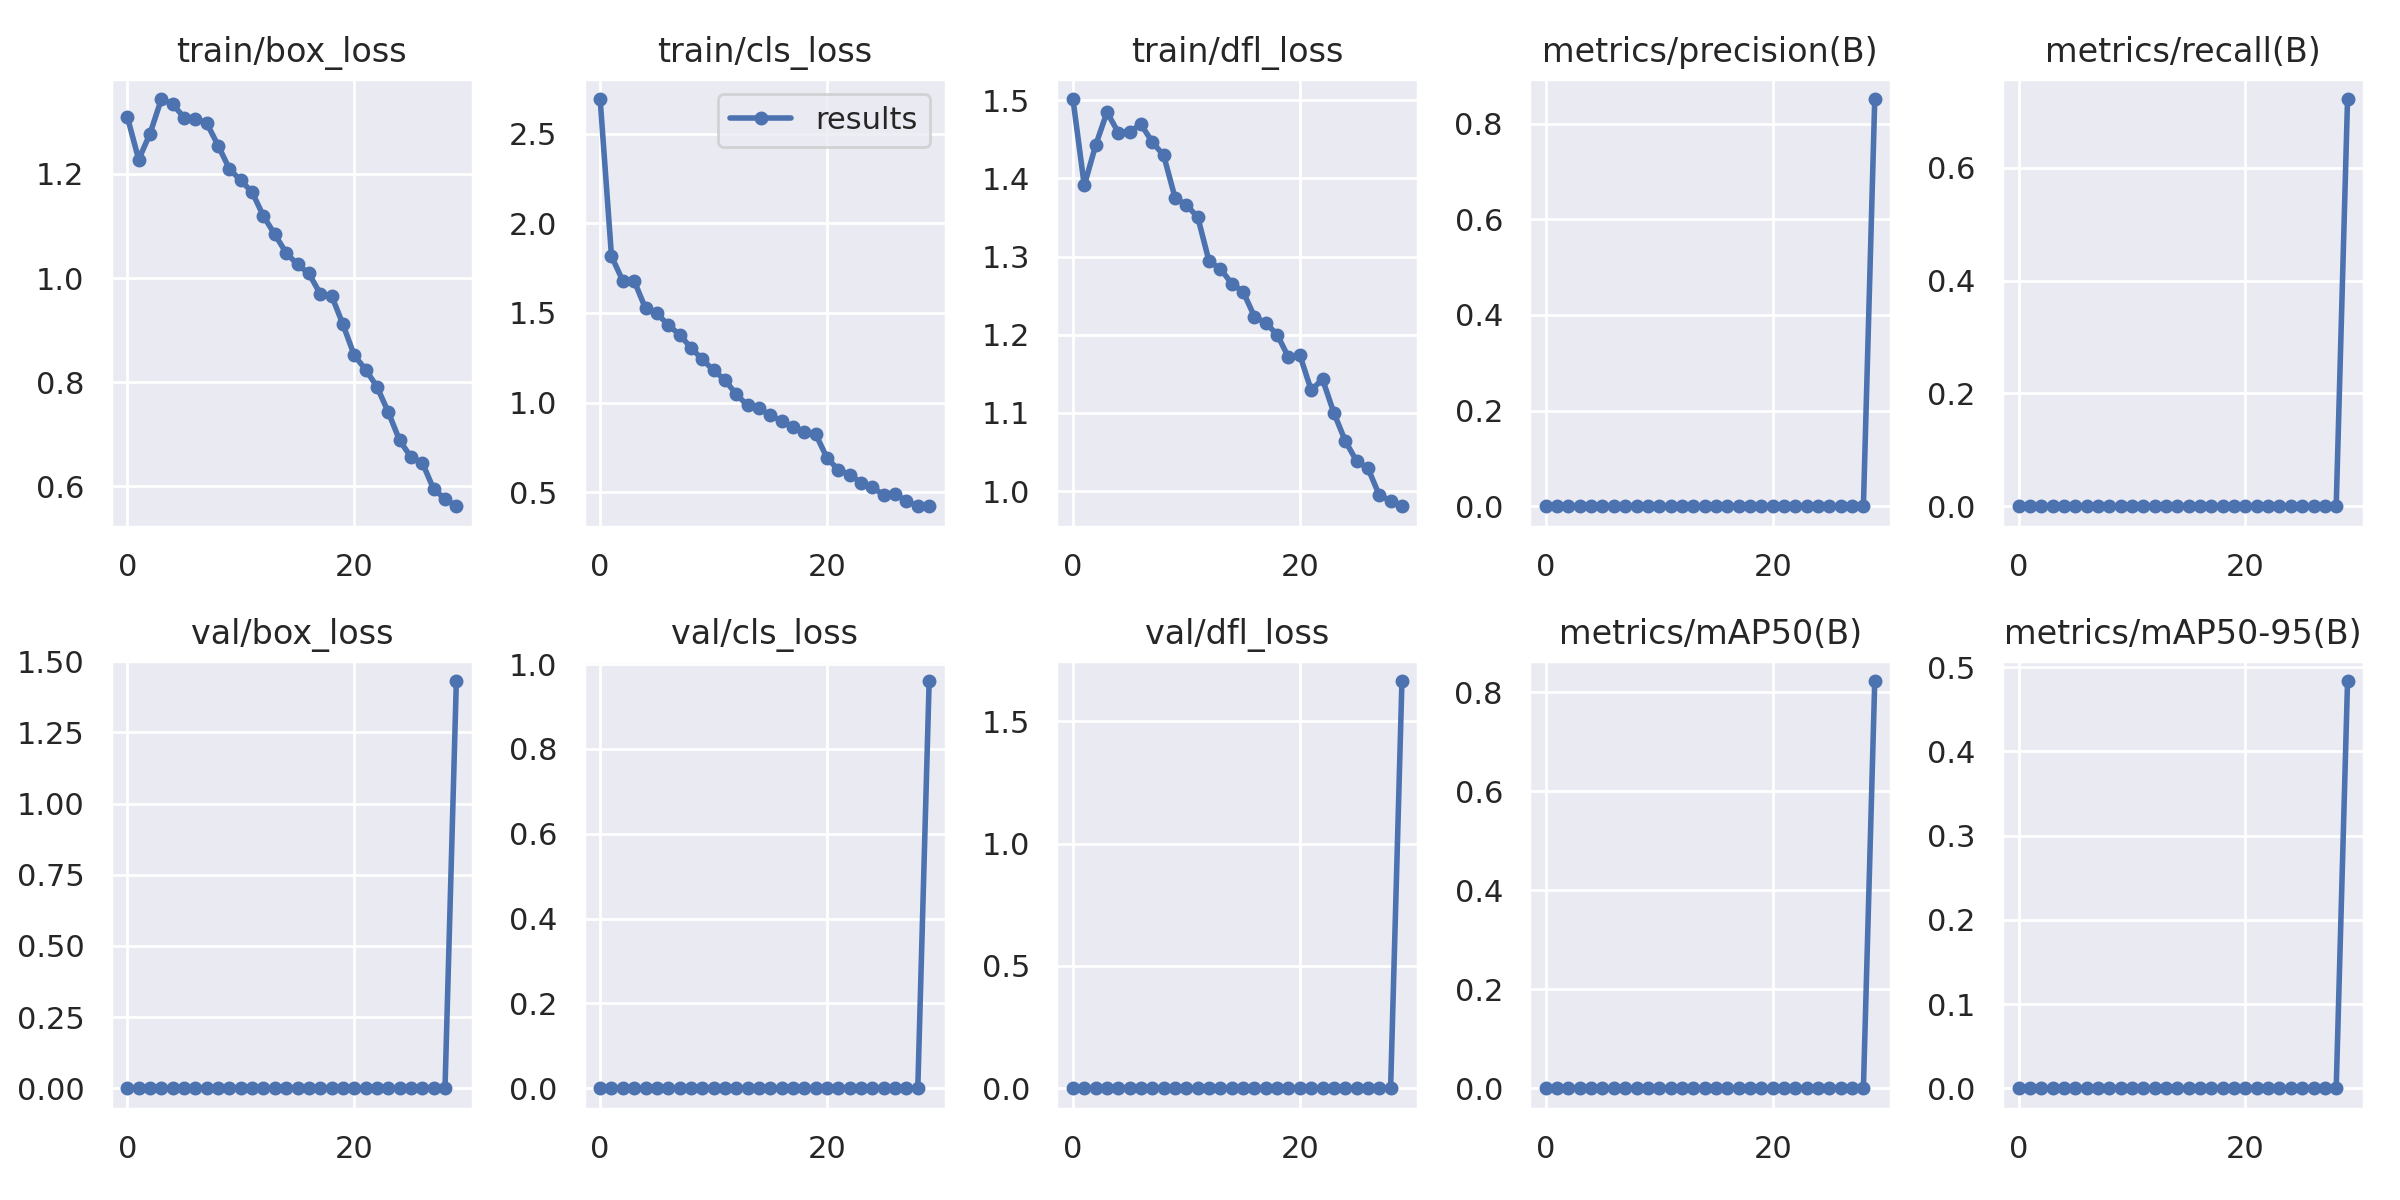

In [11]:
Image(filename='/content/drive/MyDrive/signboard_dataset/runs/detect/train2/results.png', width=600)

## Inference with Custom Model

In [12]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/signboard_dataset/data.yaml

2024-03-03 08:53:24.005551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 08:53:24.005600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 08:53:24.007067: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 08:53:25.085240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/signboard_dataset/valid/labels.cache..

In [13]:
 # !yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source=data/test/images
!yolo task=detect mode=predict model="/content/drive/MyDrive/signboard_dataset/runs/detect/train2/weights/best.pt" conf=0.25 source=/content/drive/MyDrive/signboard_dataset/test/images save=True

2024-03-03 08:54:26.870004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 08:54:26.870065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 08:54:26.871401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 08:54:27.943674: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/56 /content/drive/MyDrive/signboard_dataset/test/images/01_05_jpg.r

**NOTE:** Let's take a look at few results.

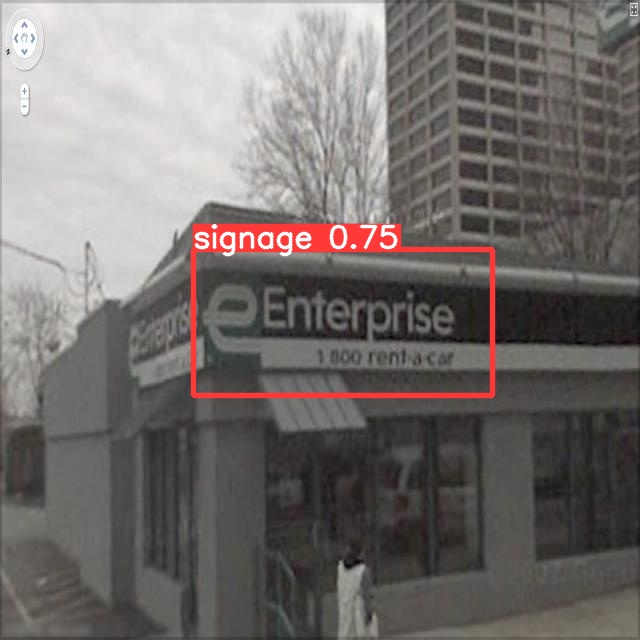

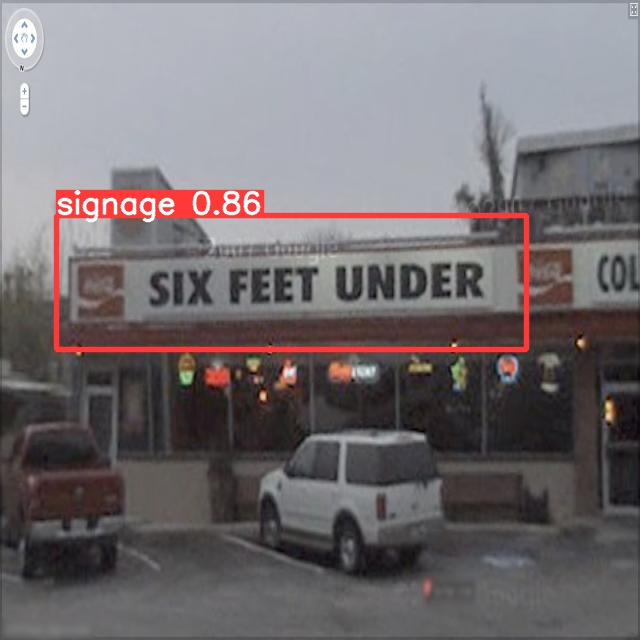

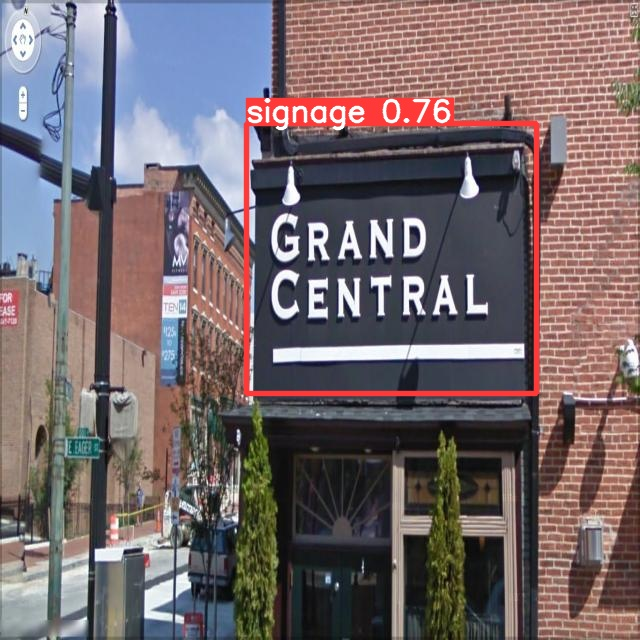

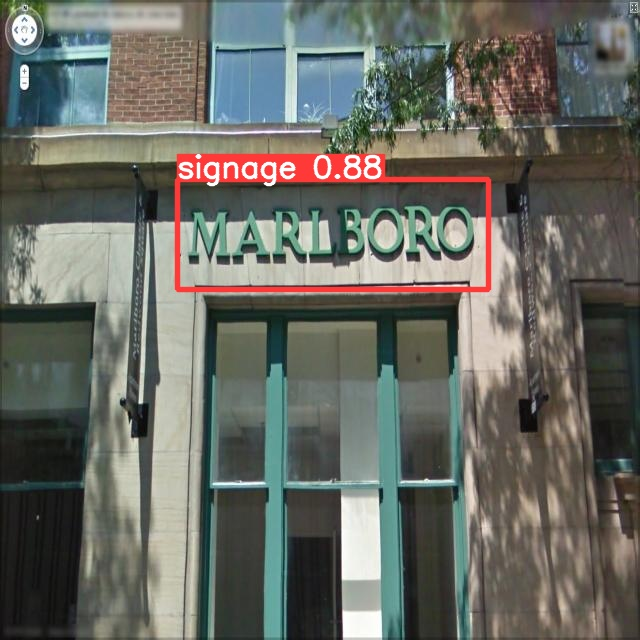

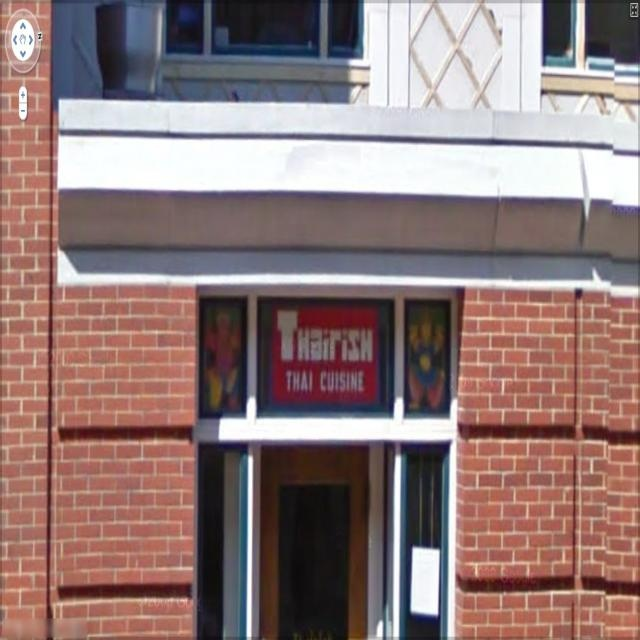

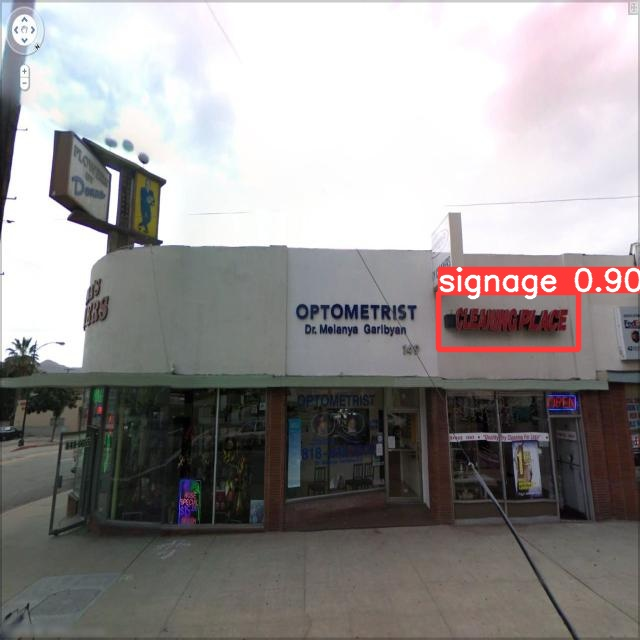

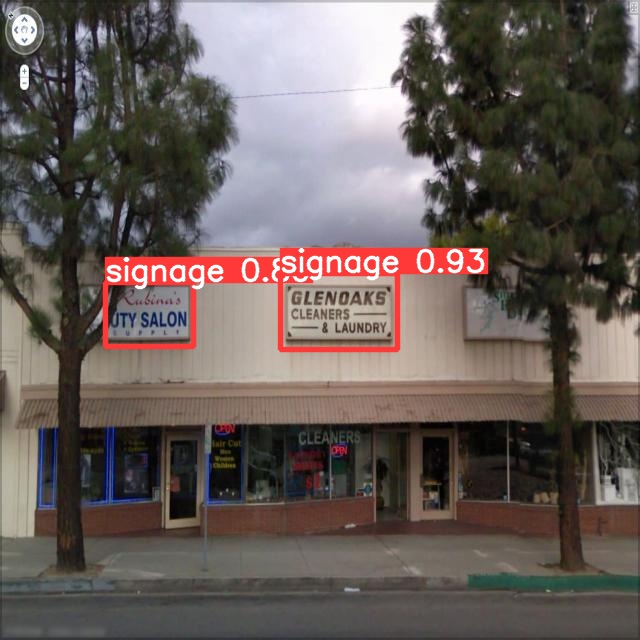

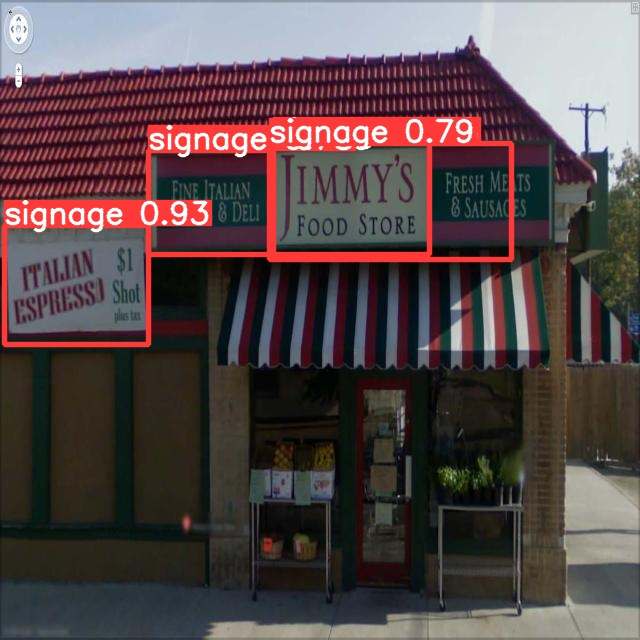

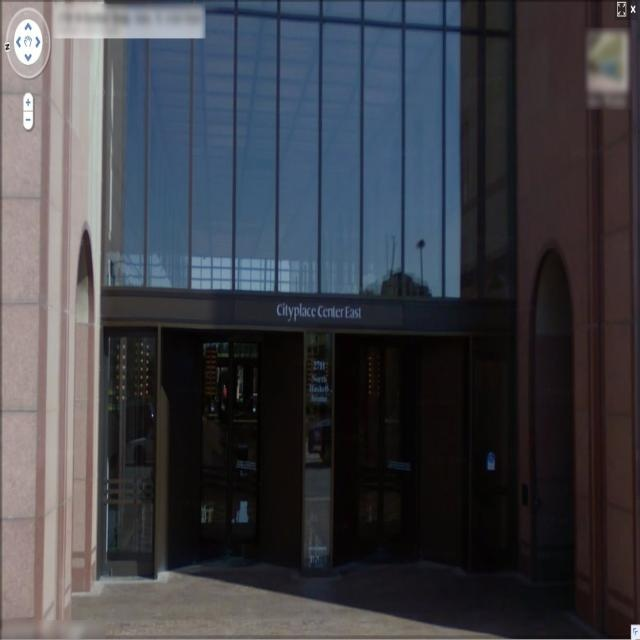

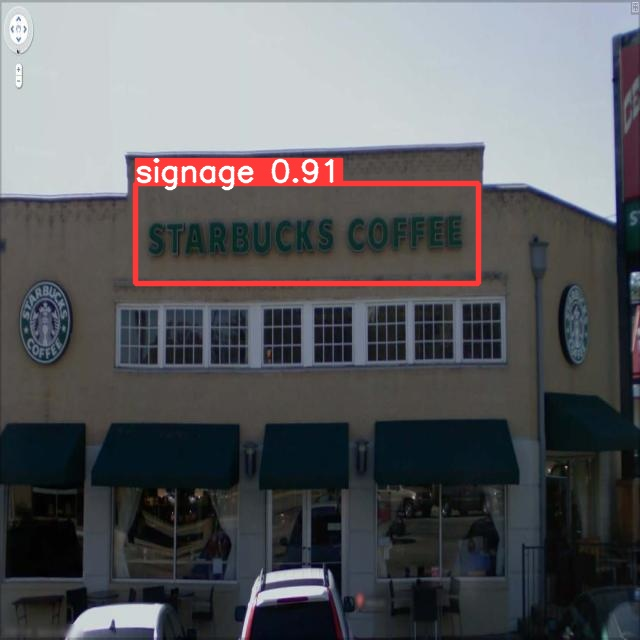

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=400))
      print("\n")

In [15]:
!pip install tf2onnx
import tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 55.8 MB/s eta 0:00:00


In [16]:
!yolo export model=/content/drive/MyDrive/signboard_dataset/runs/detect/train2/weights/best.pt format=onnx

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from /content/drive/MyDrive/signboard_dataset/runs/detect/train2/weights/best.pt with output shape (1, 5, 8400) (6.0 MB)

ONNX: starting export with onnx 1.15.0...
ONNX: export success ✅ 0.8s, saved as /content/drive/MyDrive/signboard_dataset/runs/detect/train2/weights/best.onnx (11.7 MB)

Export complete (1.6s)
Results saved to /content/drive/MyDrive/signboard_dataset/runs/detect/train2/weights
Predict:         yolo task=detect mode=predict model=/content/drive/MyDrive/signboard_dataset/runs/detect/train2/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=/content/drive/MyDrive/signboard_dataset/runs/detect/train2/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app
